<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

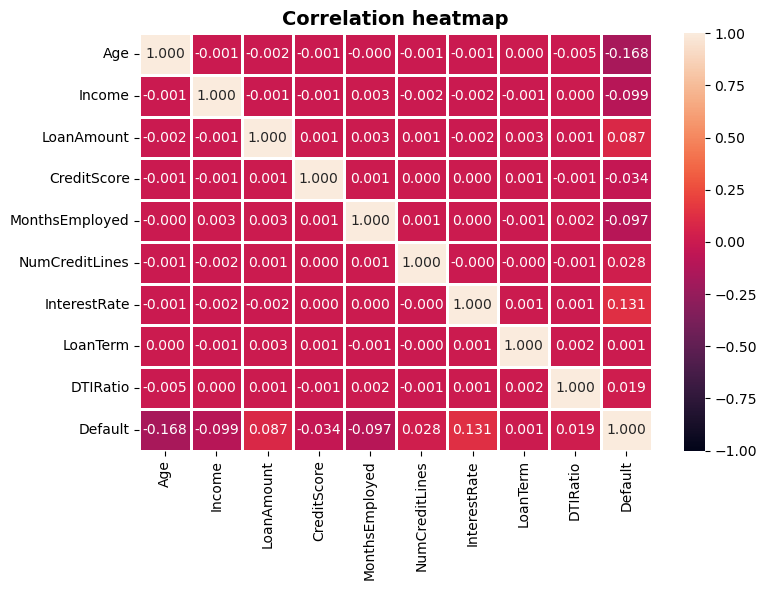

count    255347.00
mean      82499.30
std       38963.01
min       15000.00
25%       48825.50
50%       82466.00
75%      116219.00
max      149999.00
Name: Income, dtype: float64

count    255347.00
mean        574.26
std         158.90
min         300.00
25%         437.00
50%         574.00
75%         712.00
max         849.00
Name: CreditScore, dtype: float64
IncomeLevel
Very High Income        94565
Middle Income           66422
Below Average Income    66096
High Income             28261
Low Income                  3
Name: count, dtype: int64

CreditScoreLevel
Fair         93029
Average      92888
Very Good    45962
Excellent    23468
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmou

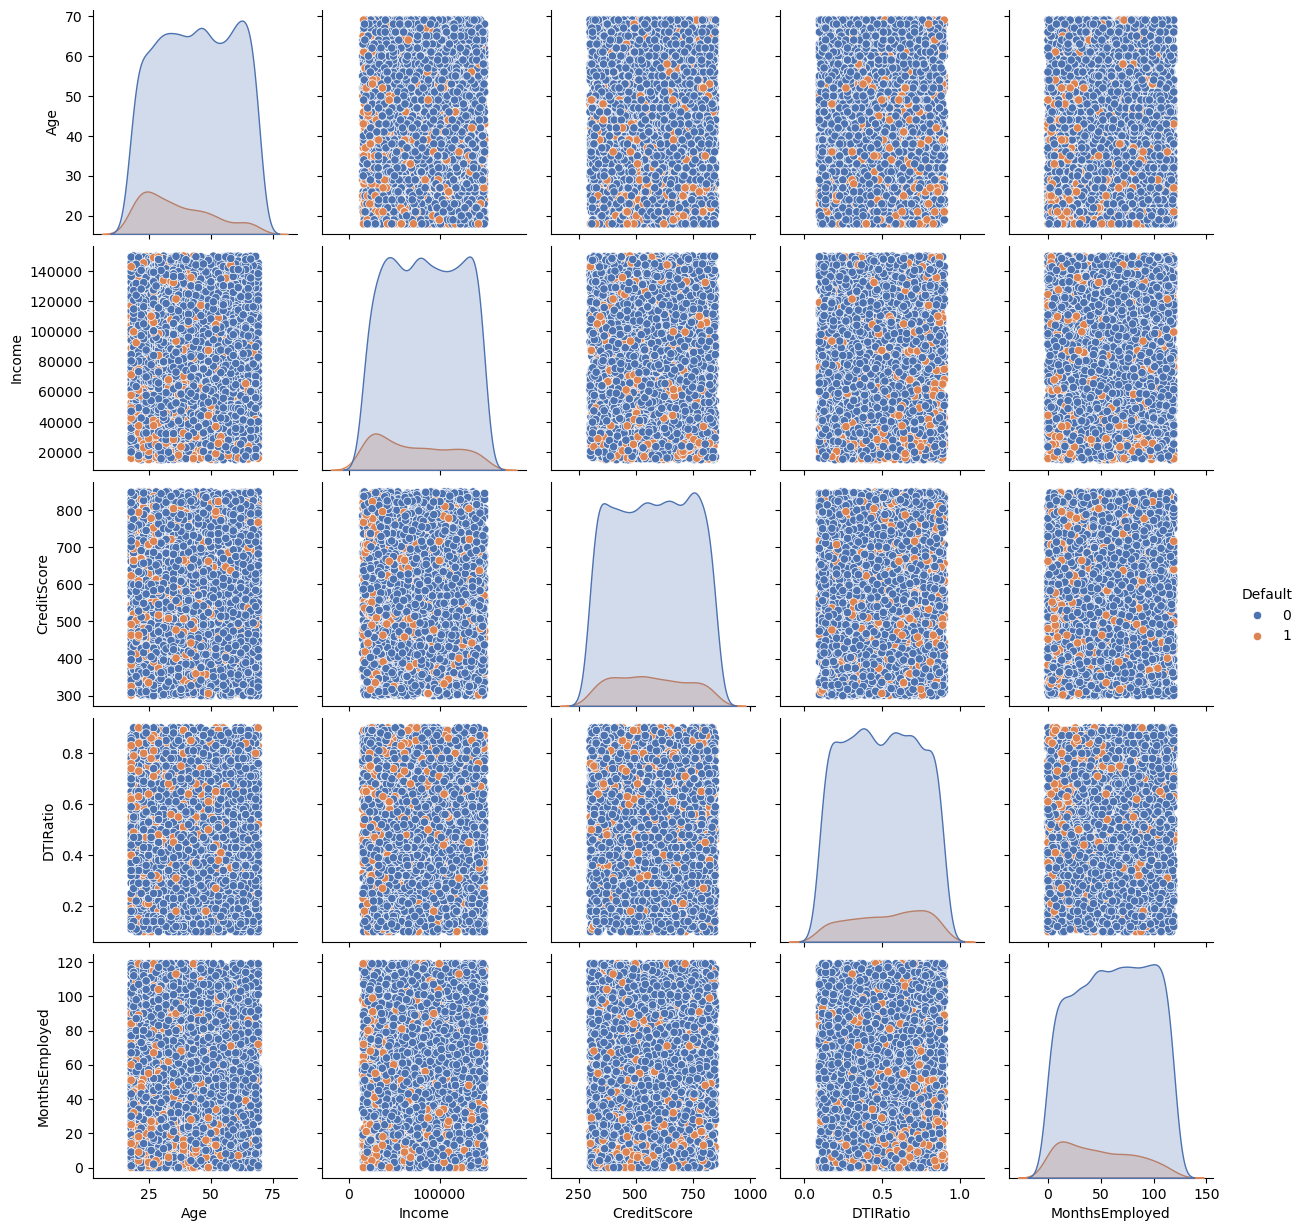

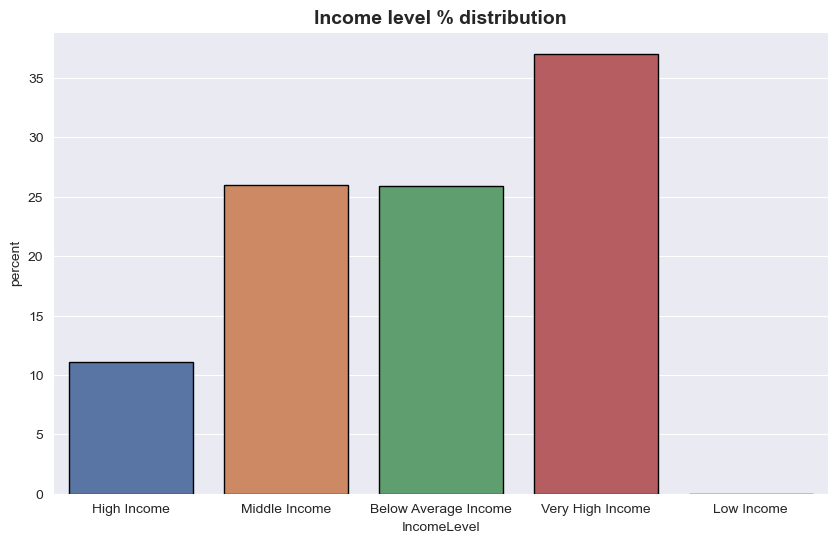

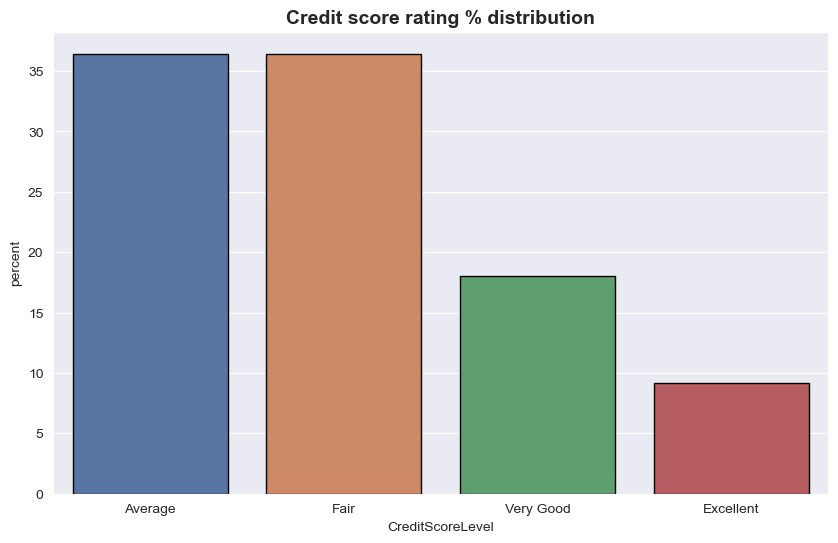

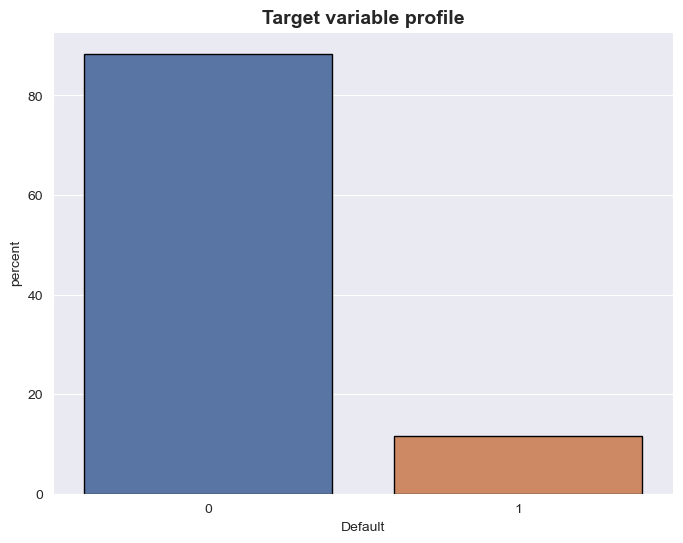

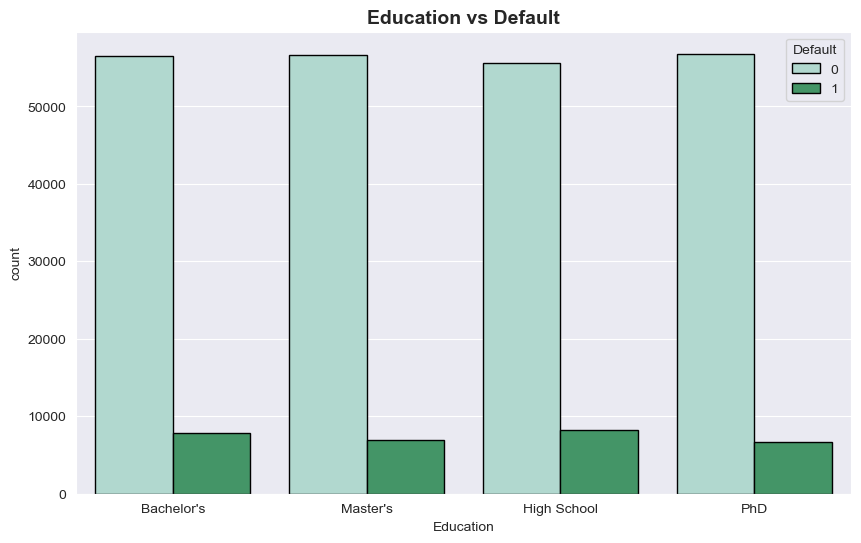

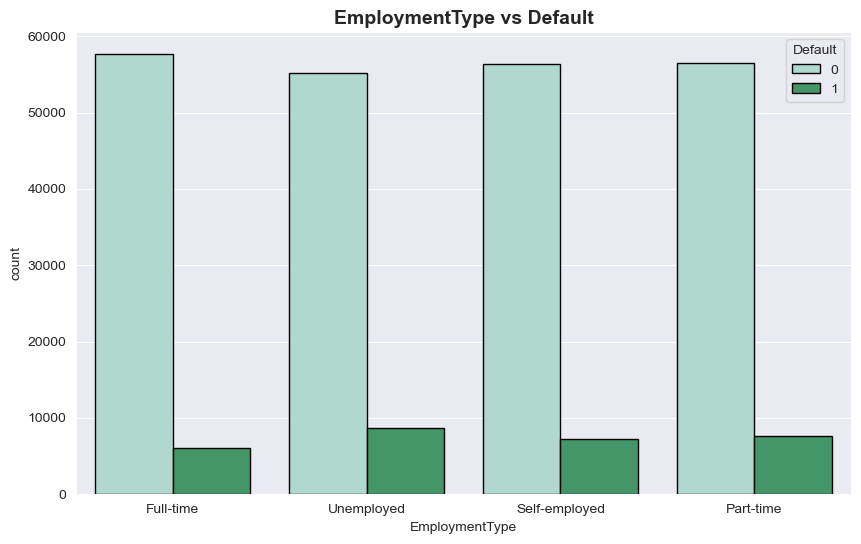

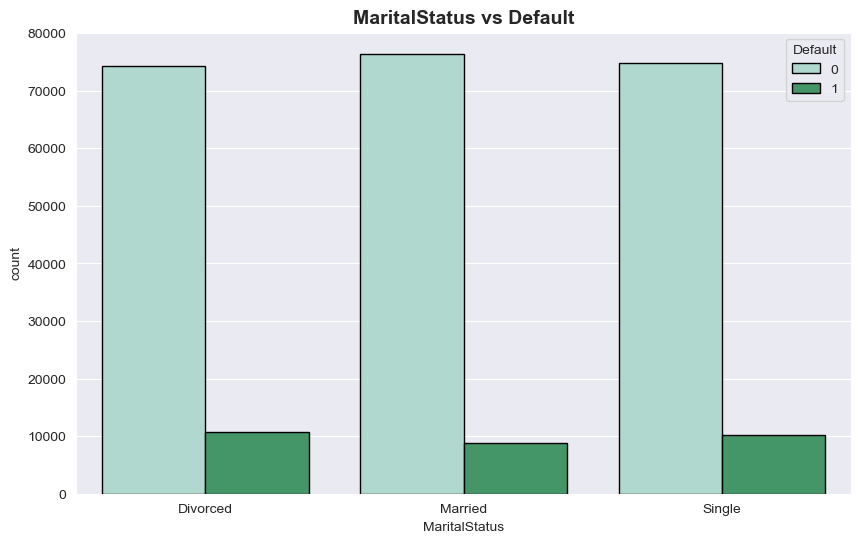

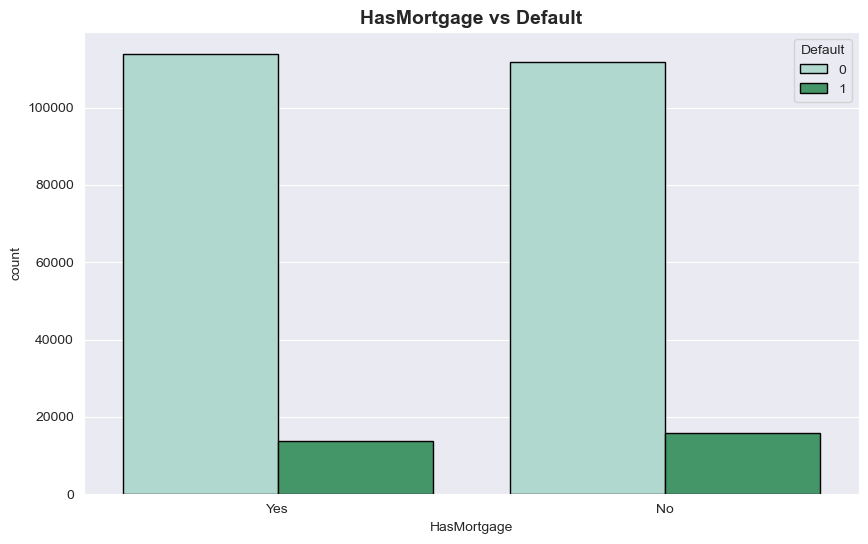

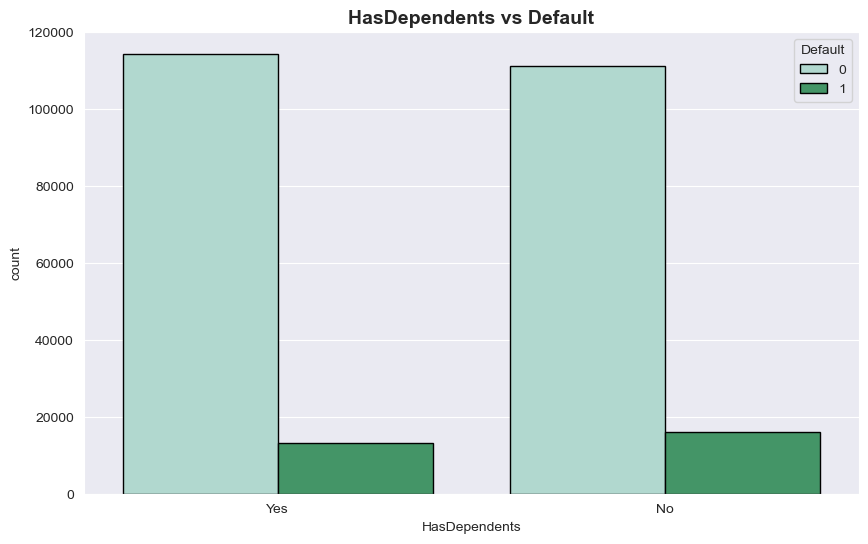

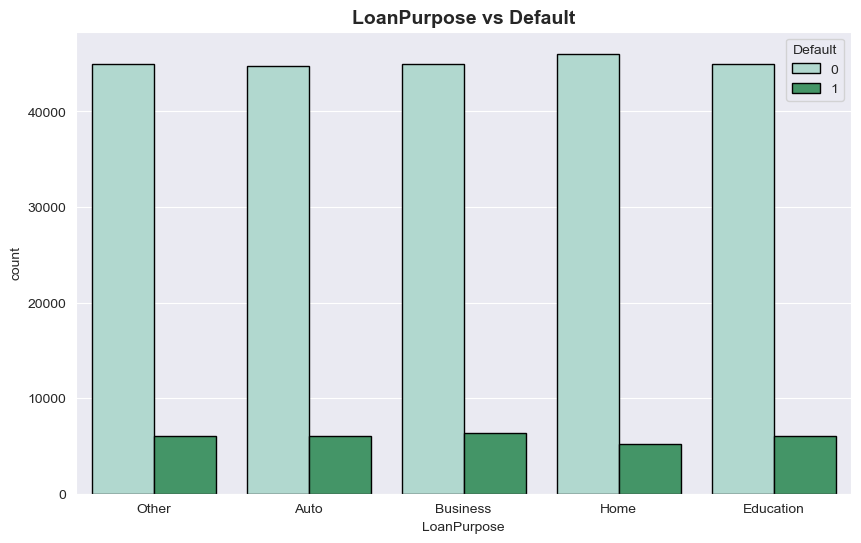

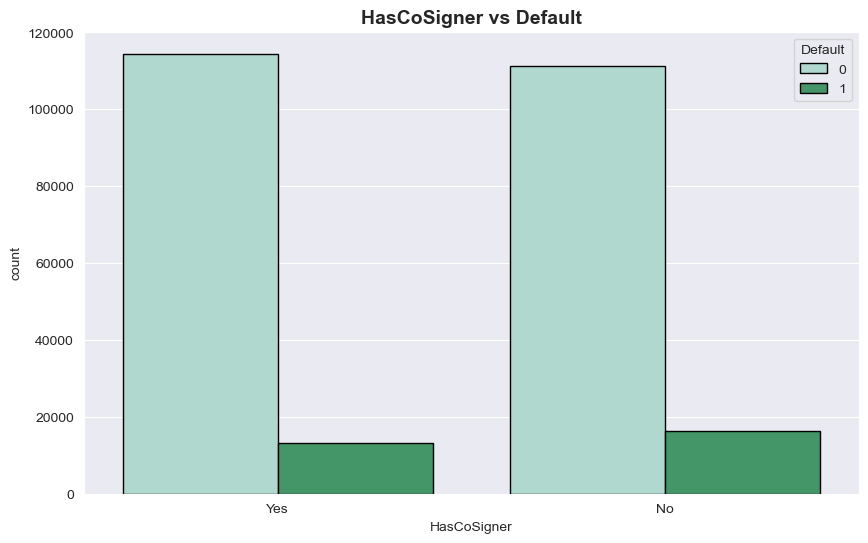

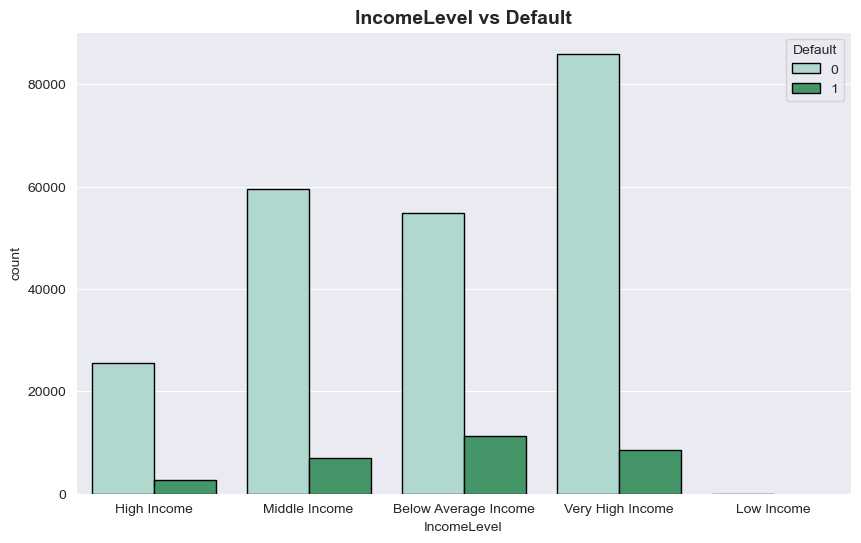

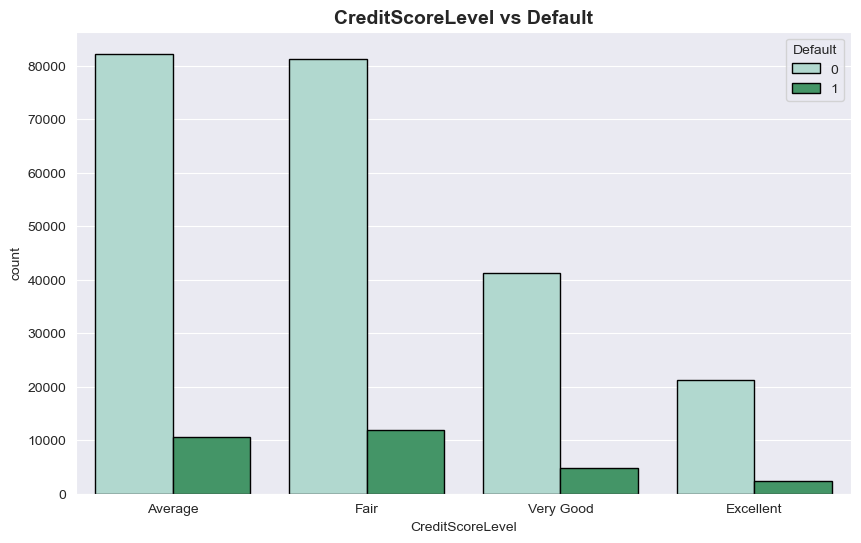

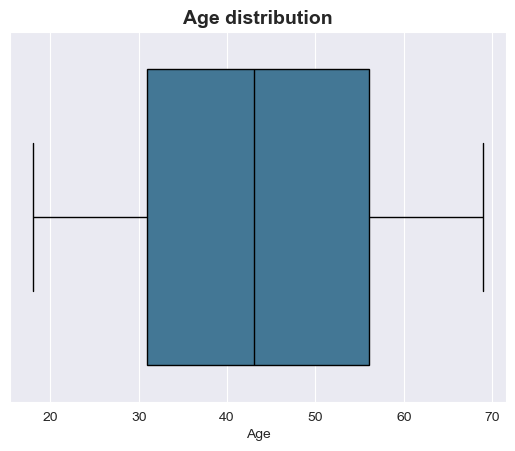

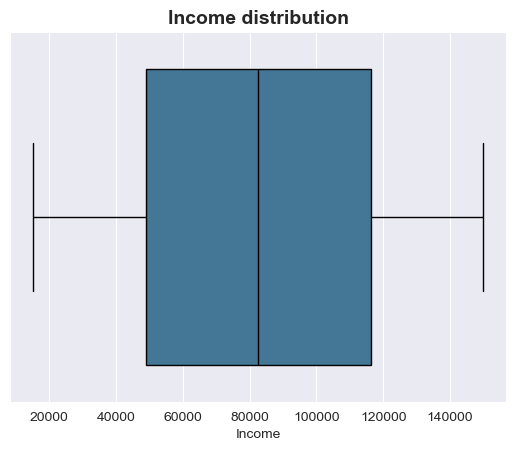

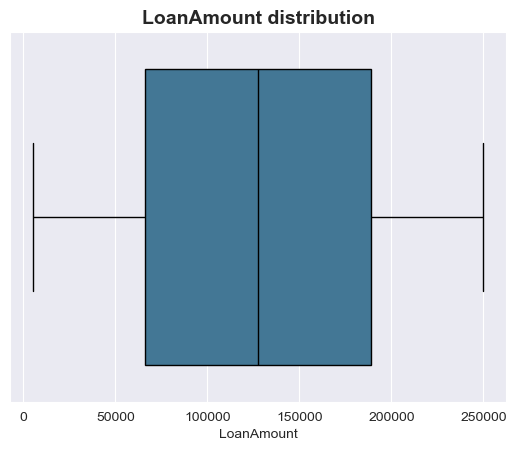

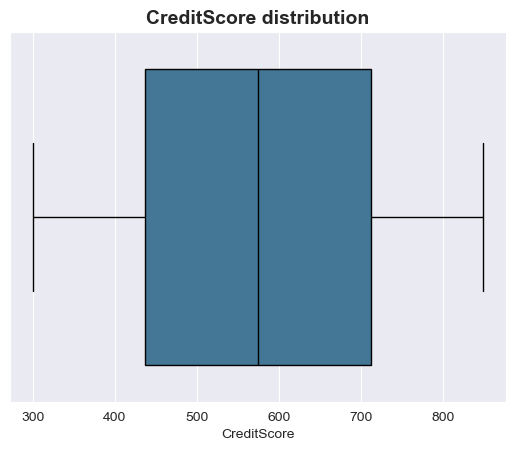

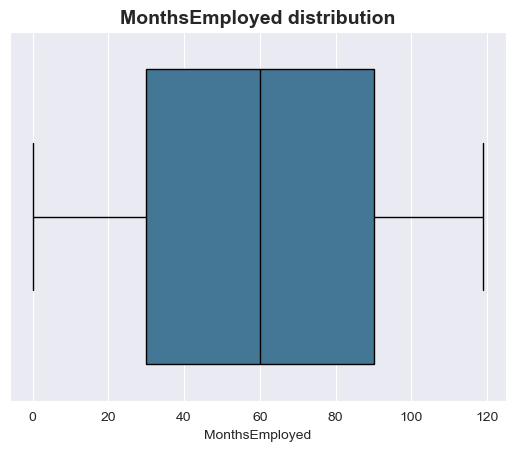

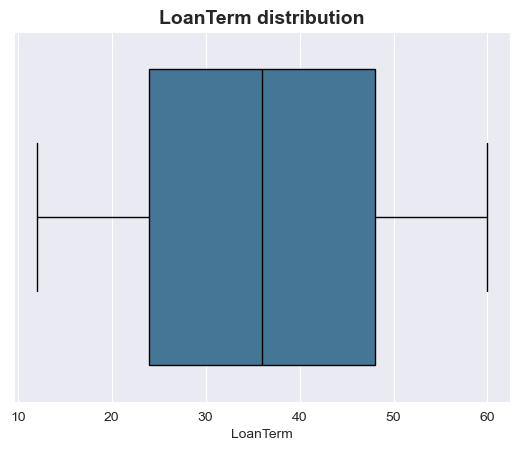

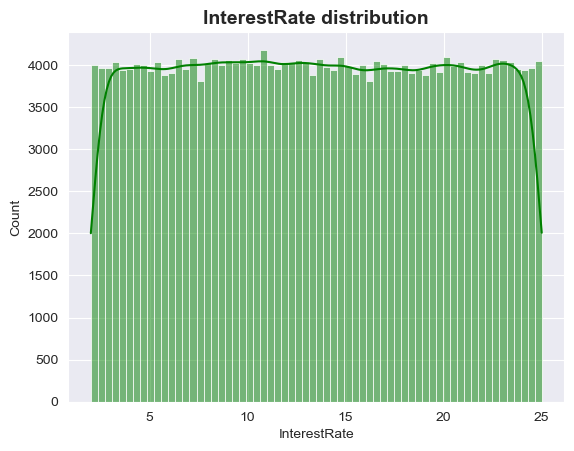

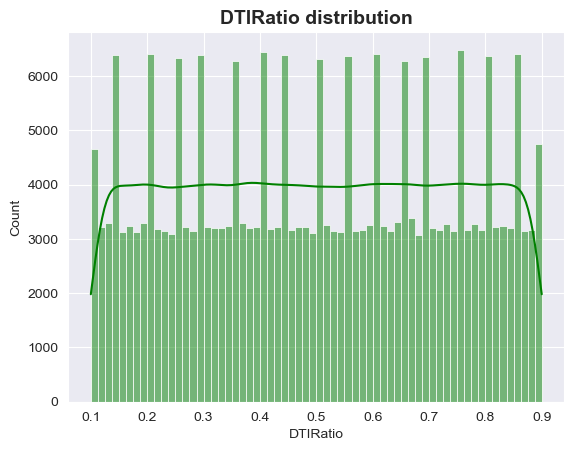

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmount        255347 non-null  int64  
 3   CreditScore       255347 non-null  int64  
 4   MonthsEmployed    255347 non-null  int64  
 5   NumCreditLines    255347 non-null  int64  
 6   InterestRate      255347 non-null  float64
 7   LoanTerm          255347 non-null  int64  
 8   DTIRatio          255347 non-null  float64
 9   Education         255347 non-null  object 
 10  EmploymentType    255347 non-null  object 
 11  MaritalStatus     255347 non-null  object 
 12  HasMortgage       255347 non-null  object 
 13  HasDependents     255347 non-null  object 
 14  LoanPurpose       255347 non-null  object 
 15  HasCoSigner       255347 non-null  object 
 16  Default     

In [1]:
# Load EDA and preprocessing notebook
%run Loan_default_preprocessing.ipynb

In [2]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, LearningCurveDisplay

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
# Copy dataframe to use for modelling
df_model = df_2.copy(deep = True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  int64  
 10  HasDependents                 255347 non-null  int64  
 11  HasCoSigner                   255347 non-null  int64  
 12  Default                       255347

## Functions List

In [4]:
# Randomized search CV function
def model_search(estimator, params, X, y):
    search = RandomizedSearchCV(
        estimator = estimator,
        param_distributions = params,
        scoring = 'f1',
        cv = 5,
        random_state = 42
    )
    search.fit(X, y)
    return search.best_estimator_

# Learning curve function
def plot_learning_curve(estimator, X, y, name, cv = 5, scoring = 'f1', num_points = 20):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator,
    X = X,
    y = y,
    train_sizes = np.linspace(0.1, 1.0, num_points),
    cv = cv,
    scoring = scoring,
    )

    display = LearningCurveDisplay(
    train_sizes = train_sizes,
    train_scores = train_scores, 
    test_scores = test_scores, 
    score_name = 'f1'
    )

    plt.figure(figsize = (8, 6))
    display.plot(line_kw = {'marker': 'o'}, fill_between_kw = {'alpha': 0.3})
    plt.title(f'Learning Curve - {name}', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'Learning curve {name}.jpeg', bbox_inches = 'tight')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Cross validation score function
def cross_validation(model, x, y):
    cv_score = cross_val_score(model, x, y, cv = 5, scoring  = 'f1')
    print(f'Cross validation f1 score is {cv_score.mean().round(3)} and standard deviation is {cv_score.std().round(3)}')
    
# Prediction function
def predictor(model, x, y):
    prediction = model.predict(x)
    prediction_probability = model.predict_proba(x)
    score = model.score(x, y)
    return [prediction, prediction_probability, score]

# Classification report function
def report(test, prediction):
    model_report = metrics.classification_report(test, prediction)
    print(model_report)

# Precision recall function
def plot_recall_precision(test, prediction_prob, name):
    plt.figure(figsize = (8, 6))
    PrecisionRecallDisplay.from_predictions(test, prediction_prob, plot_chance_level = True, name = name)
    plt.title(f'Precision recall curve {name}', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'Precision recall curve {name}', bbox_inches = 'tight')
    plt.tight_layout()
    plt.show()


# ROC AUC curve function
def plot_ROC(test, prediction_prob, name):
    plt.figure(figsize = (8, 6))
    RocCurveDisplay.from_predictions(test, prediction_prob, name = name)
    plt.title(f'ROC curve {name}', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'ROC curve {name}.jpeg', bbox_inches = 'tight')
    plt.tight_layout()
    plt.show()

# Confusion matrix
def plot_matrix(test, predictions, title):
    plt.figure(figsize = (8, 6))
    ConfusionMatrixDisplay.from_predictions(test, predictions)
    plt.title(f'Confusion matrix {title}', fontsize = 14, fontweight = 'bold')
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f'Confusion matrix {title}.jpeg', bbox_inches = 'tight')
    plt.show()

## Train test split

In [5]:
# Define X and y
X = df_model.drop('Default', axis = 1)
y = df_model['Default']

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (178742, 30)
Shape of X_test: (76605, 30)
Shape of y_train: (178742,)
Shape of y_test: (76605,)


## Imbalance 

In [8]:
# Target variable is heavily imbalanced
print(y_train.value_counts())
print()
print(y_test.value_counts())

Default
0    158013
1     20729
Name: count, dtype: int64

Default
0    67681
1     8924
Name: count, dtype: int64


In [9]:
# Rebalance the target variable - Training set only
rus = RandomUnderSampler(sampling_strategy = 'auto', random_state = 42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
print(f'Resample X_train shape:{X_train_res.shape}')
print()
print(y_train_res.value_counts())

Resample X_train shape:(41458, 30)

Default
0    20729
1    20729
Name: count, dtype: int64


## Scale features

In [10]:
# Scale the data for model fitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

## Feature Selection

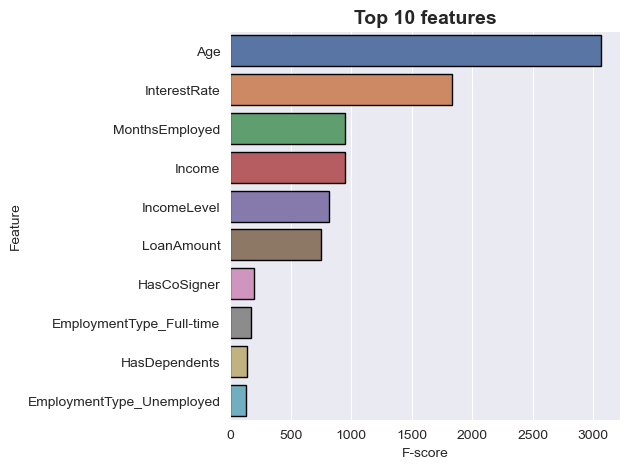

In [11]:
# Select features - SelectKBest
selector = SelectKBest(score_func = f_classif, k = 10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train_res)
X_test_sel = selector.transform(X_test_scaled)

# Declare score and p-values
score = selector.scores_.round(2)
p_values = selector.pvalues_.round(4)
mask = selector.get_support()

# Create new dataframe for selected features
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'F-score': score,
    'p-value': p_values,
    'Selected': mask
})

final_features = selected_features[selected_features['Selected']].sort_values(by = 'F-score', ascending=False)

sns.barplot(
    data = final_features,
    x = 'F-score',
    y = 'Feature',
    edgecolor = 'black',
    palette = 'deep'
)
plt.title('Top 10 features', fontweight = 'bold', fontsize = 14)
plt.tight_layout()
plt.savefig('Features.jpeg')
plt.show()

## Base Model - KNearestNeighbors

In [12]:
# Declare base model 1 = KNN
neigh_list = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'auto'],
    'p': [1, 2]
} 

neigh = KNeighborsClassifier()

# Fit model to training set
clf1 = model_search(neigh, neigh_list, X_train_sel, y_train_res)
fit_clf1 = clf1.fit(X_train_sel, y_train_res)

In [13]:
# CV score - KNN
cross_validation(clf1, X_train_sel, y_train_res)

Cross validation f1 score is 0.658 and standard deviation is 0.004


<Figure size 800x600 with 0 Axes>

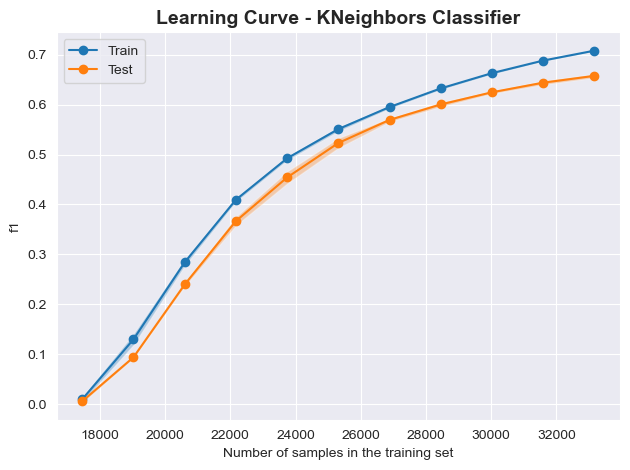

In [14]:
# Learning curve - KNN
plot_learning_curve(clf1, X_train_sel, y_train_res, 'KNeighbors Classifier')

In [15]:
# Predict KNN on test data
knn_predictor = predictor(fit_clf1, X_test_sel, y_test)
print(f'KNN score on test set: {round(knn_predictor[2],2)}')

KNN score on test set: 0.65


In [16]:
# Classification report - KNN
report(y_test, knn_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     67681
           1       0.20      0.66      0.31      8924

    accuracy                           0.65     76605
   macro avg       0.57      0.66      0.54     76605
weighted avg       0.85      0.65      0.71     76605



<Figure size 800x600 with 0 Axes>

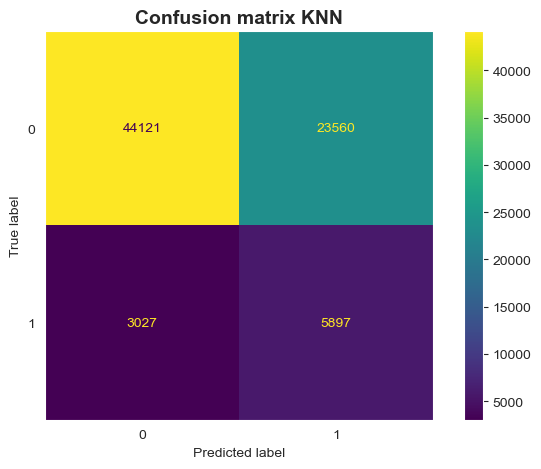

In [17]:
# Confusion matrix - KNN
plot_matrix(y_test, knn_predictor[0], 'KNN')

<Figure size 800x600 with 0 Axes>

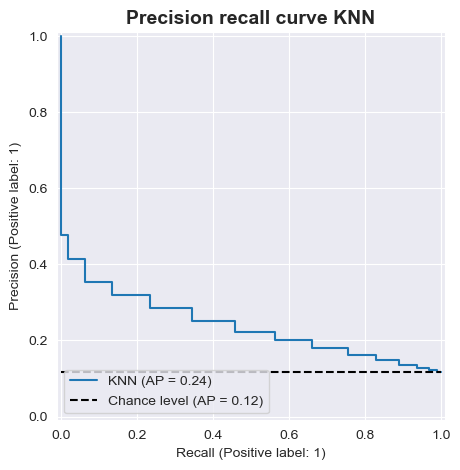

In [18]:
# PrecisionRecall plot - KNN
plot_recall_precision(y_test, knn_predictor[1][:,1], 'KNN')

<Figure size 800x600 with 0 Axes>

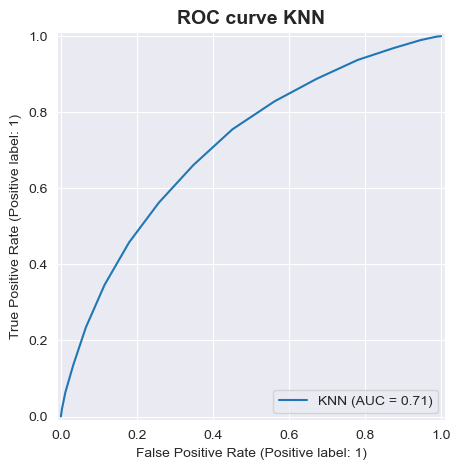

In [19]:
# ROC AUC curve plot - KNN
plot_ROC(y_test, knn_predictor[1][:,1], 'KNN')

## Base Model - Decision Trees

In [20]:
# Declare base model 2 = Decision Trees
tree_list = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6]
} 

tree = DecisionTreeClassifier(random_state = 42)

# Fit model to training set
clf2 = model_search(tree, tree_list, X_train_sel, y_train_res)
fit_clf2 = clf2.fit(X_train_sel, y_train_res)

In [21]:
# CV score - Decision Tree
cross_validation(clf2, X_train_sel, y_train_res)

Cross validation f1 score is 0.66 and standard deviation is 0.006


<Figure size 800x600 with 0 Axes>

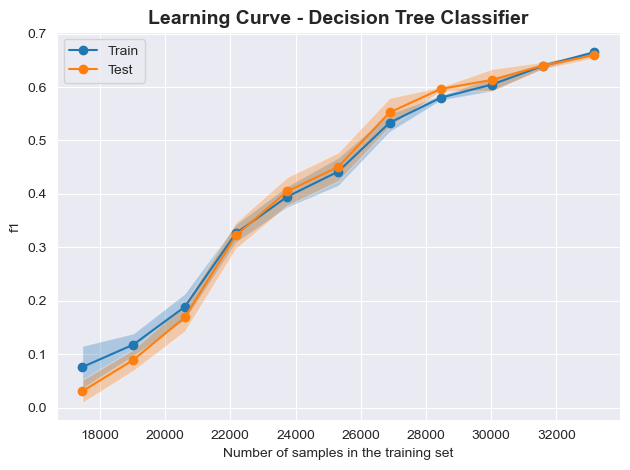

In [22]:
# Learning curve - Decision Tree
plot_learning_curve(clf2, X_train_sel, y_train_res, 'Decision Tree Classifier')

In [23]:
# Predict Decision Tree on test data
tree_predictor = predictor(fit_clf2, X_test_sel, y_test)
print(f'Tree score on test set: {round(tree_predictor[2],2)}')

Tree score on test set: 0.66


In [24]:
# Classification report - Decision Tree
report(y_test, tree_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.66      0.77     67681
           1       0.20      0.67      0.31      8924

    accuracy                           0.66     76605
   macro avg       0.57      0.66      0.54     76605
weighted avg       0.85      0.66      0.72     76605



<Figure size 800x600 with 0 Axes>

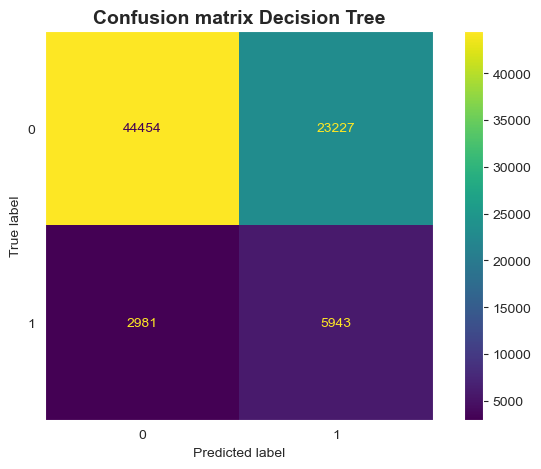

In [25]:
# Confusion matrix - Decision Tree
plot_matrix(y_test, tree_predictor[0], 'Decision Tree')

<Figure size 800x600 with 0 Axes>

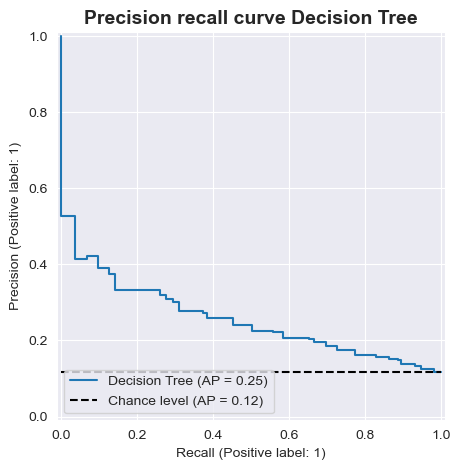

In [26]:
# PrecisionRecall plot - Decision Tree
plot_recall_precision(y_test, tree_predictor[1][:,1], 'Decision Tree')

<Figure size 800x600 with 0 Axes>

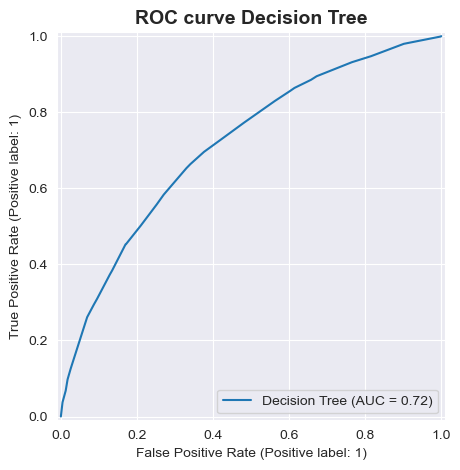

In [27]:
# ROC AUC curve plot - Decision Tree
plot_ROC(y_test, tree_predictor[1][:,1], 'Decision Tree')

## Base model - Naive Bayes

In [28]:
# Declare base model 3 = Naive Bayes
gnb_list = {
    'var_smoothing': [1e-9, 1e-6, 1e-3],
} 

gnb = GaussianNB()

# Fit model to training set
clf3 = model_search(gnb, gnb_list, X_train_sel, y_train_res)
fit_clf3 = clf3.fit(X_train_sel, y_train_res)

In [29]:
# CV score - GaussianNB
cross_validation(clf3, X_train_sel, y_train_res)

Cross validation f1 score is 0.672 and standard deviation is 0.002


<Figure size 800x600 with 0 Axes>

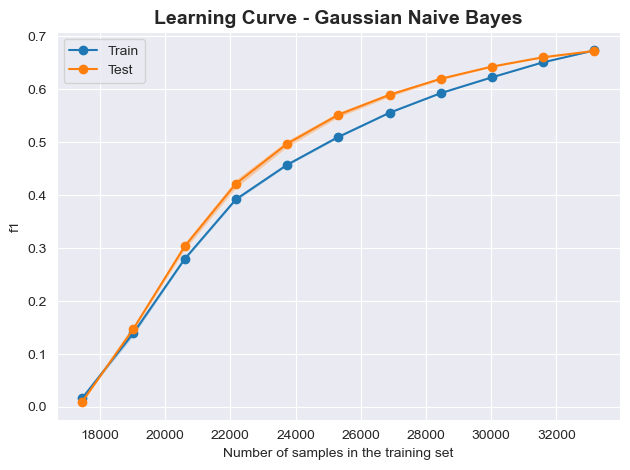

In [30]:
# Learning curve - GaussianNB
plot_learning_curve(clf3, X_train_sel, y_train_res, 'Gaussian Naive Bayes')

In [31]:
# Predict GaussianNB on test data
gnb_predictor = predictor(fit_clf3, X_test_sel, y_test)
print(f'Gaussian Naive Bayes score on test set: {round(gnb_predictor[2],2)}')

Gaussian Naive Bayes score on test set: 0.66


In [32]:
# Classification report - GaussianNB
report(y_test, gnb_predictor[0])

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     67681
           1       0.21      0.68      0.32      8924

    accuracy                           0.66     76605
   macro avg       0.57      0.67      0.55     76605
weighted avg       0.85      0.66      0.72     76605



<Figure size 800x600 with 0 Axes>

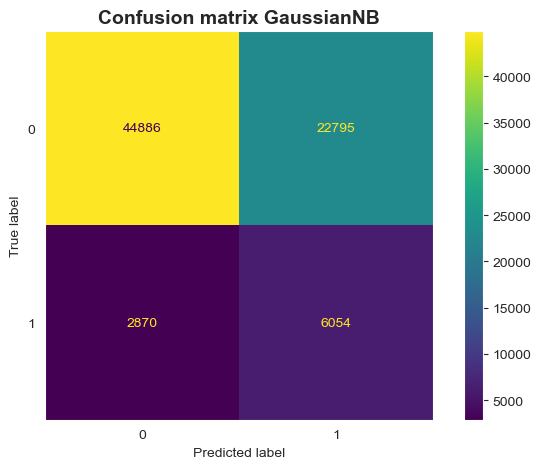

In [33]:
# Confusion matrix - GaussianNB
plot_matrix(y_test, gnb_predictor[0], 'GaussianNB')

<Figure size 800x600 with 0 Axes>

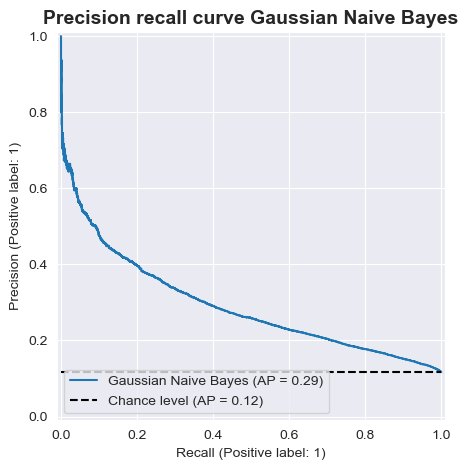

In [34]:
# PrecisionRecall plot - GaussianNB
plot_recall_precision(y_test, gnb_predictor[1][:,1], 'Gaussian Naive Bayes')

<Figure size 800x600 with 0 Axes>

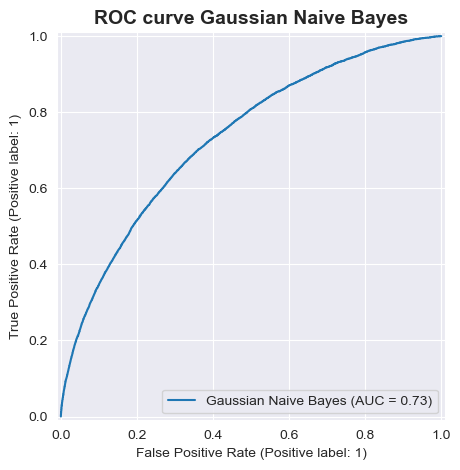

In [35]:
# ROC AUC curve plot - GaussianNB
plot_ROC(y_test, gnb_predictor[1][:,1], 'Gaussian Naive Bayes')